In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [11]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

nx = 9
ny = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    print(fname, ret)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

camera_cal/calibration1.jpg False
camera_cal/calibration10.jpg True
camera_cal/calibration11.jpg True
camera_cal/calibration12.jpg True
camera_cal/calibration13.jpg True
camera_cal/calibration14.jpg True
camera_cal/calibration15.jpg True
camera_cal/calibration16.jpg True
camera_cal/calibration17.jpg True
camera_cal/calibration18.jpg True
camera_cal/calibration19.jpg True
camera_cal/calibration2.jpg True
camera_cal/calibration20.jpg True
camera_cal/calibration3.jpg True
camera_cal/calibration4.jpg False
camera_cal/calibration5.jpg False
camera_cal/calibration6.jpg True
camera_cal/calibration7.jpg True
camera_cal/calibration8.jpg True
camera_cal/calibration9.jpg True


### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

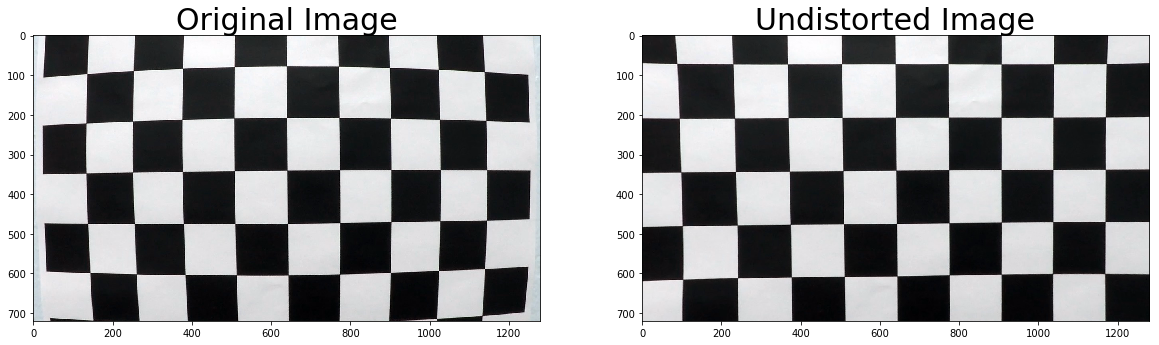

In [15]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('camera_cal/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('output_images/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

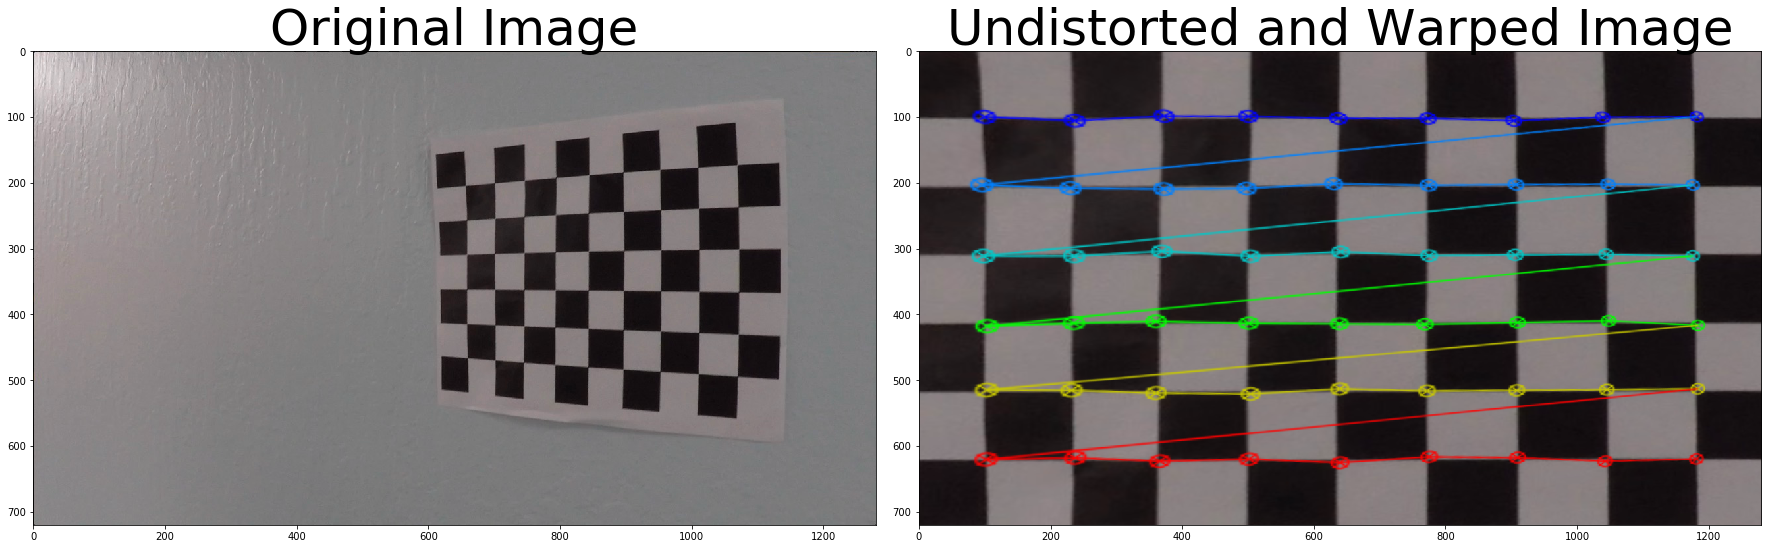

In [10]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('camera_cal/calibration12.jpg')
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

def corners_unwarp(img, nx, ny, mtx, dist):
    img_size = (img.shape[1], img.shape[0])
    img = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    if ret == False: return img
    cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
    # top-left, bottom-left, bottom-right, top-right
    src = np.float32([corners[0], corners[nx*(ny-1)], corners[-1], corners[nx-1]])
    src = src.reshape((4,2))
    offset = 100
    x1 = offset
    y1 = offset
    x2 = img_size[0] - offset
    y2 = img_size[1] - offset
    dst = np.float32([[x1,y1],[x1,y2],[x2,y2],[x2,y1]])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

top_down = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


# undistort

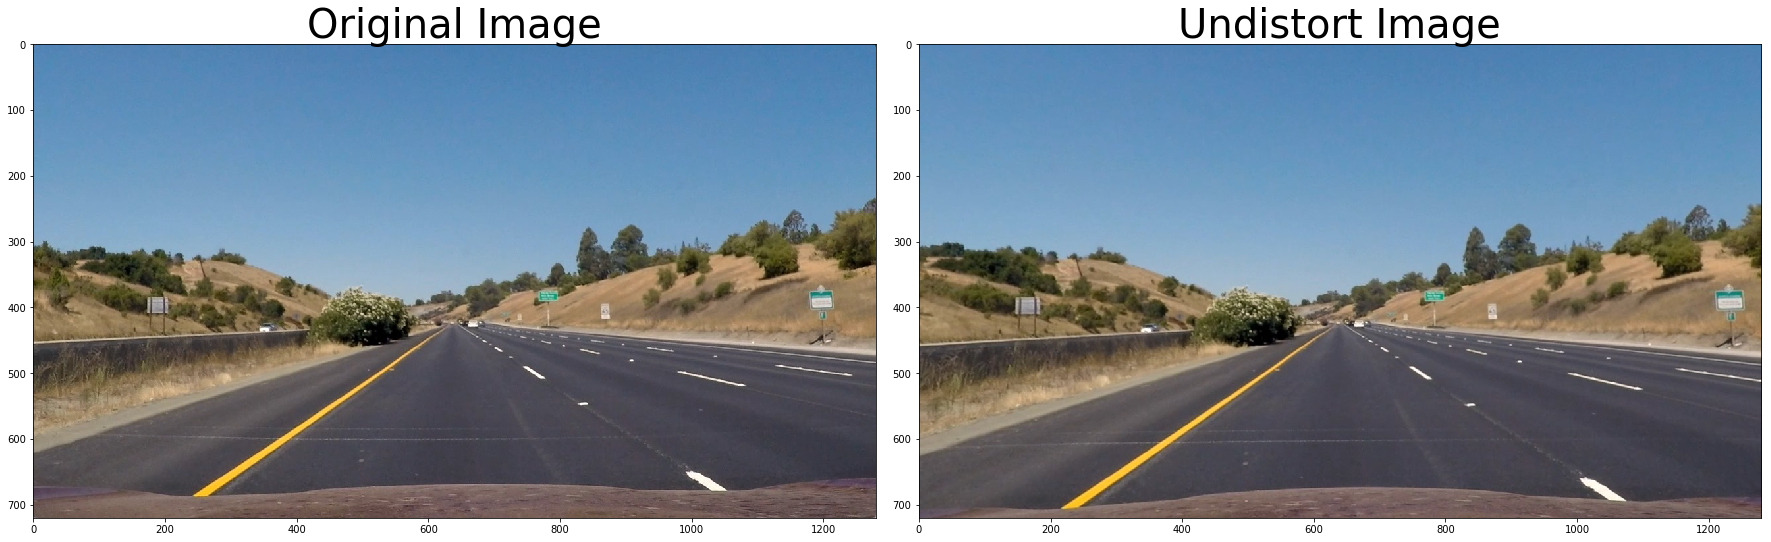

In [128]:
dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
image = mpimg.imread('test_images/straight_lines1.jpg')

result = cv2.undistort(image, mtx, dist, None, mtx)
bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
cv2.imwrite('test_images/straight_lines1_undist.jpg',bgr)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Undistort Image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig('output_images/undistort.jpg')

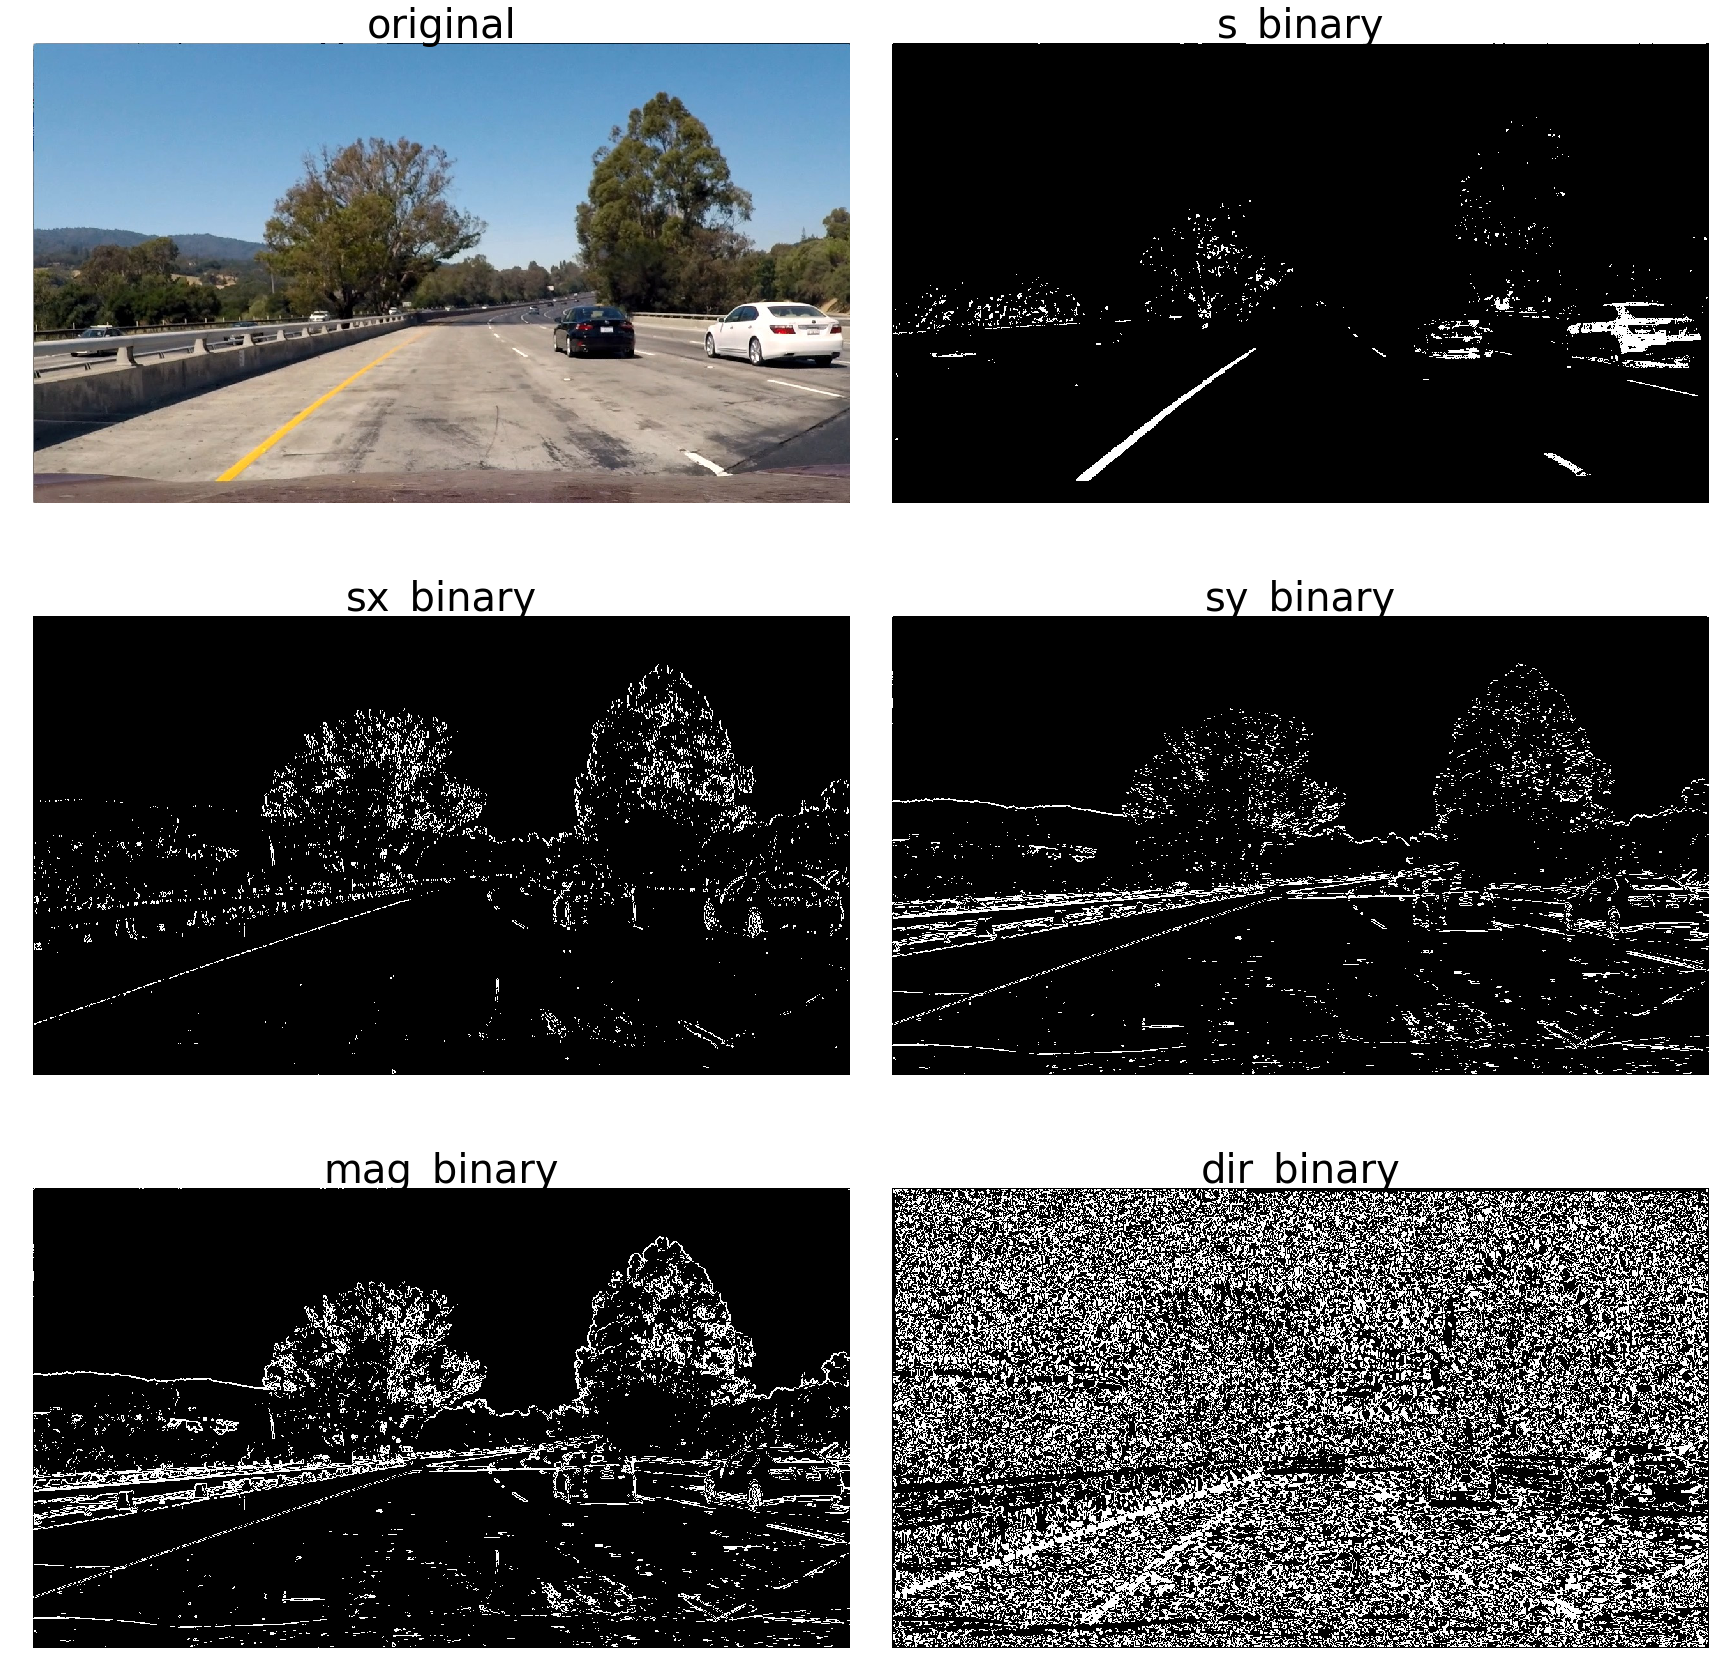

In [158]:
def s_channel(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    s_channel = hsv[:,:,2]
    return s_channel

def mag_thresh(img, sch=False, orientation='xy', sobel_kernel=3, mag_thresh=(0, 255)):
    gray = s_channel(img) if sch else cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    if orientation == 'x':
        abs_sobel = np.absolute(sobelx)
    elif orientation == 'y':
        abs_sobel = np.absolute(sobely)
    else:
        abs_sobel = np.sqrt(sobelx**2 + sobely**2)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    thresh_min = mag_thresh[0]
    thresh_max = mag_thresh[1]
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sbinary

def dir_threshold(img, sch=False, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = s_channel(img) if sch else cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobel = np.sqrt(sobelx**2 + sobely**2)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    dir_sobel = np.arctan2(abs_sobely, abs_sobelx)
    thresh_min = thresh[0]
    thresh_max = thresh[1]
    sbinary = np.zeros_like(dir_sobel)
    sbinary[(dir_sobel >= thresh_min) & (dir_sobel <= thresh_max)] = 1
    return sbinary

def s_threshold(img, s_thresh=(170, 255)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]

    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    return s_binary

image = mpimg.imread('test_images/test1.jpg')

sx_binary = mag_thresh(image, orientation='x', sobel_kernel=3, mag_thresh=(30, 100))
sy_binary = mag_thresh(image, orientation='y', sobel_kernel=3, mag_thresh=(30, 100))
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
s_binary = s_threshold(image)

images = [
    (image, 'original'),
    (s_binary, 's_binary'),
    (sx_binary, 'sx_binary'),
    (sy_binary, 'sy_binary'),
    (mag_binary, 'mag_binary'),
    (dir_binary, 'dir_binary'),
]

n_rows = 3
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*12, n_rows*8))
fig.tight_layout()
for i in range(n_rows):
    for j in range(n_cols):
        idx = i*n_cols+j
        img = images[idx]
        cmap = 'gray' if idx > 0 else None
        axs[i][j].axis('off')
        axs[i][j].imshow(img[0], cmap=cmap)
        axs[i][j].set_title(img[1], fontsize=40)

plt.savefig('output_images/binary_test1.jpg')

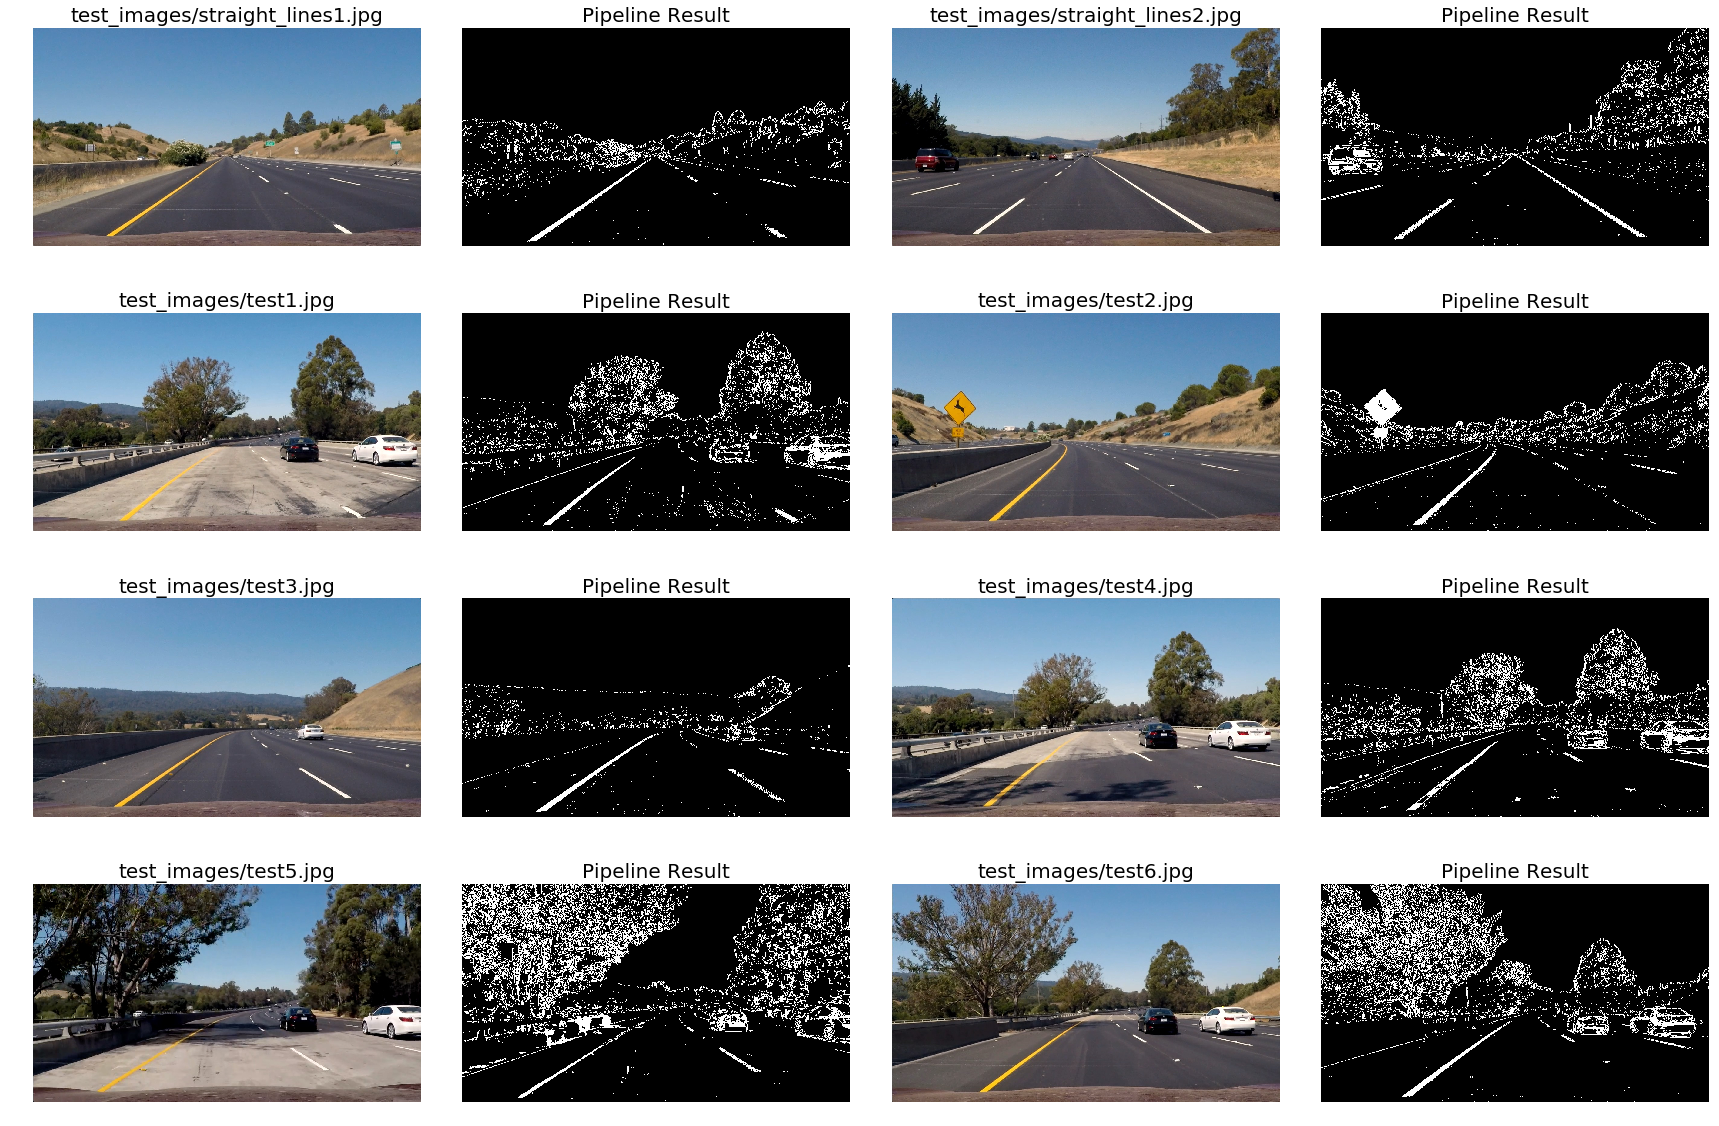

In [173]:
dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

def pipeline(img, mtx, dist, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # undistort
    img = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    combined = np.zeros_like(sxbinary)
    combined[(sxbinary == 1) | (s_binary == 1)] = 1
    return combined

# Make a list of calibration images
images = glob.glob('test_images/*.jpg')

results = []

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    image = mpimg.imread(fname)
    result = pipeline(image, mtx, dist)
    results.extend([(image, fname), (result, 'Pipeline Result')])

n_rows = len(images)//2
n_cols = 2*2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*12/2, n_rows*8/2))
fig.tight_layout()
for i in range(n_rows):
    for j in range(n_cols):
        img = results[i*n_cols+j]
        cmap = 'gray' if j % 2 == 1 else None
        axs[i][j].axis('off')
        axs[i][j].imshow(img[0], cmap=cmap)
        axs[i][j].set_title(img[1], fontsize=20)

plt.savefig('output_images/binary_images.jpg')

-1

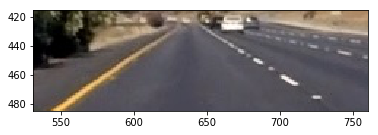

In [143]:
# show image to find out coordinates manually
%matplotlib qt

image = mpimg.imread('test_images/straight_lines1.jpg')
plt.imshow(image)
cv2.waitKey(50*1000)


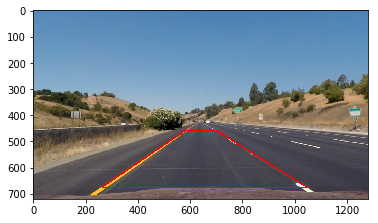

In [144]:
# make sure it's right
%matplotlib inline

# top-left, bottom-left, bottom-right, top-right
pts = np.array([(582, 458), (263, 675), (1047, 675), (699, 458)])

img = mpimg.imread('test_images/straight_lines1_undist.jpg')
points = np.array(pts, np.int32)
points = points.reshape((-1,1,2))
cv2.polylines(img,[points],True,(255,0,0),3)
plt.imshow(img)


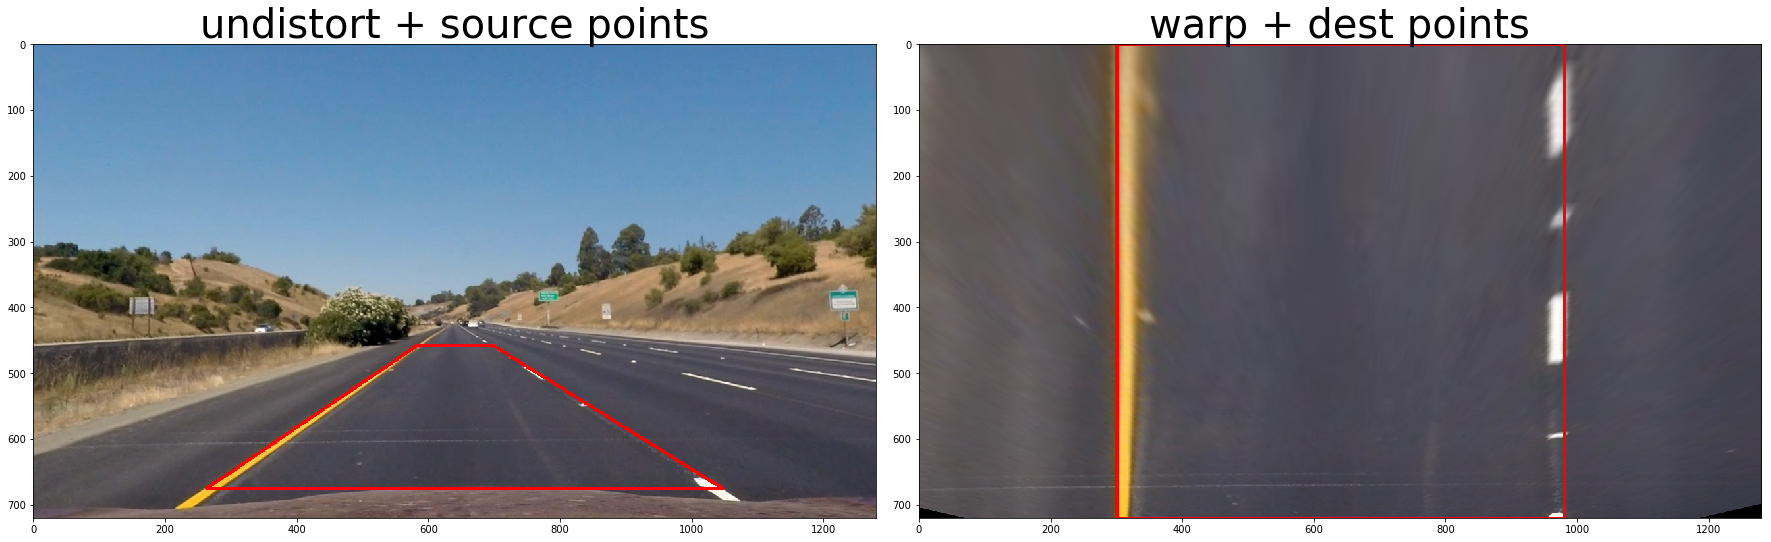

In [160]:
# warp and transform

dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# top-left, bottom-left, bottom-right, top-right
pts = np.array([(582, 458), (263, 675), (1047, 675), (699, 458)])

def warp(img, mtx, dist, drawline=False):
    img_size = (img.shape[1], img.shape[0])
    img = cv2.undistort(img, mtx, dist, None, mtx)
    src = np.float32(pts)
    offsetx = 300
    offsety = 0
    x1 = offsetx
    y1 = offsety
    x2 = img_size[0] - offsetx
    y2 = img_size[1] - offsety
    dst = np.float32([[x1,y1],[x1,y2],[x2,y2],[x2,y1]])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    points = np.array(dst, np.int32)
    points = points.reshape((-1,1,2))
    if drawline: cv2.polylines(warped,[points],True,(255,0,0),3)
    return warped

# undistort + source points
img = mpimg.imread('output_images/straight_lines1_undist.jpg')
points = np.array(pts, np.int32)
points = points.reshape((-1,1,2))
cv2.polylines(img,[points],True,(255,0,0),3)
img1 = np.copy(img)

# warp + dest points
img = mpimg.imread('test_images/straight_lines1.jpg')
warped = warp(img, mtx, dist, drawline=True)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img1)
ax1.set_title('undistort + source points', fontsize=40)

ax2.imshow(warped)
ax2.set_title('warp + dest points', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig('output_images/warp.jpg')

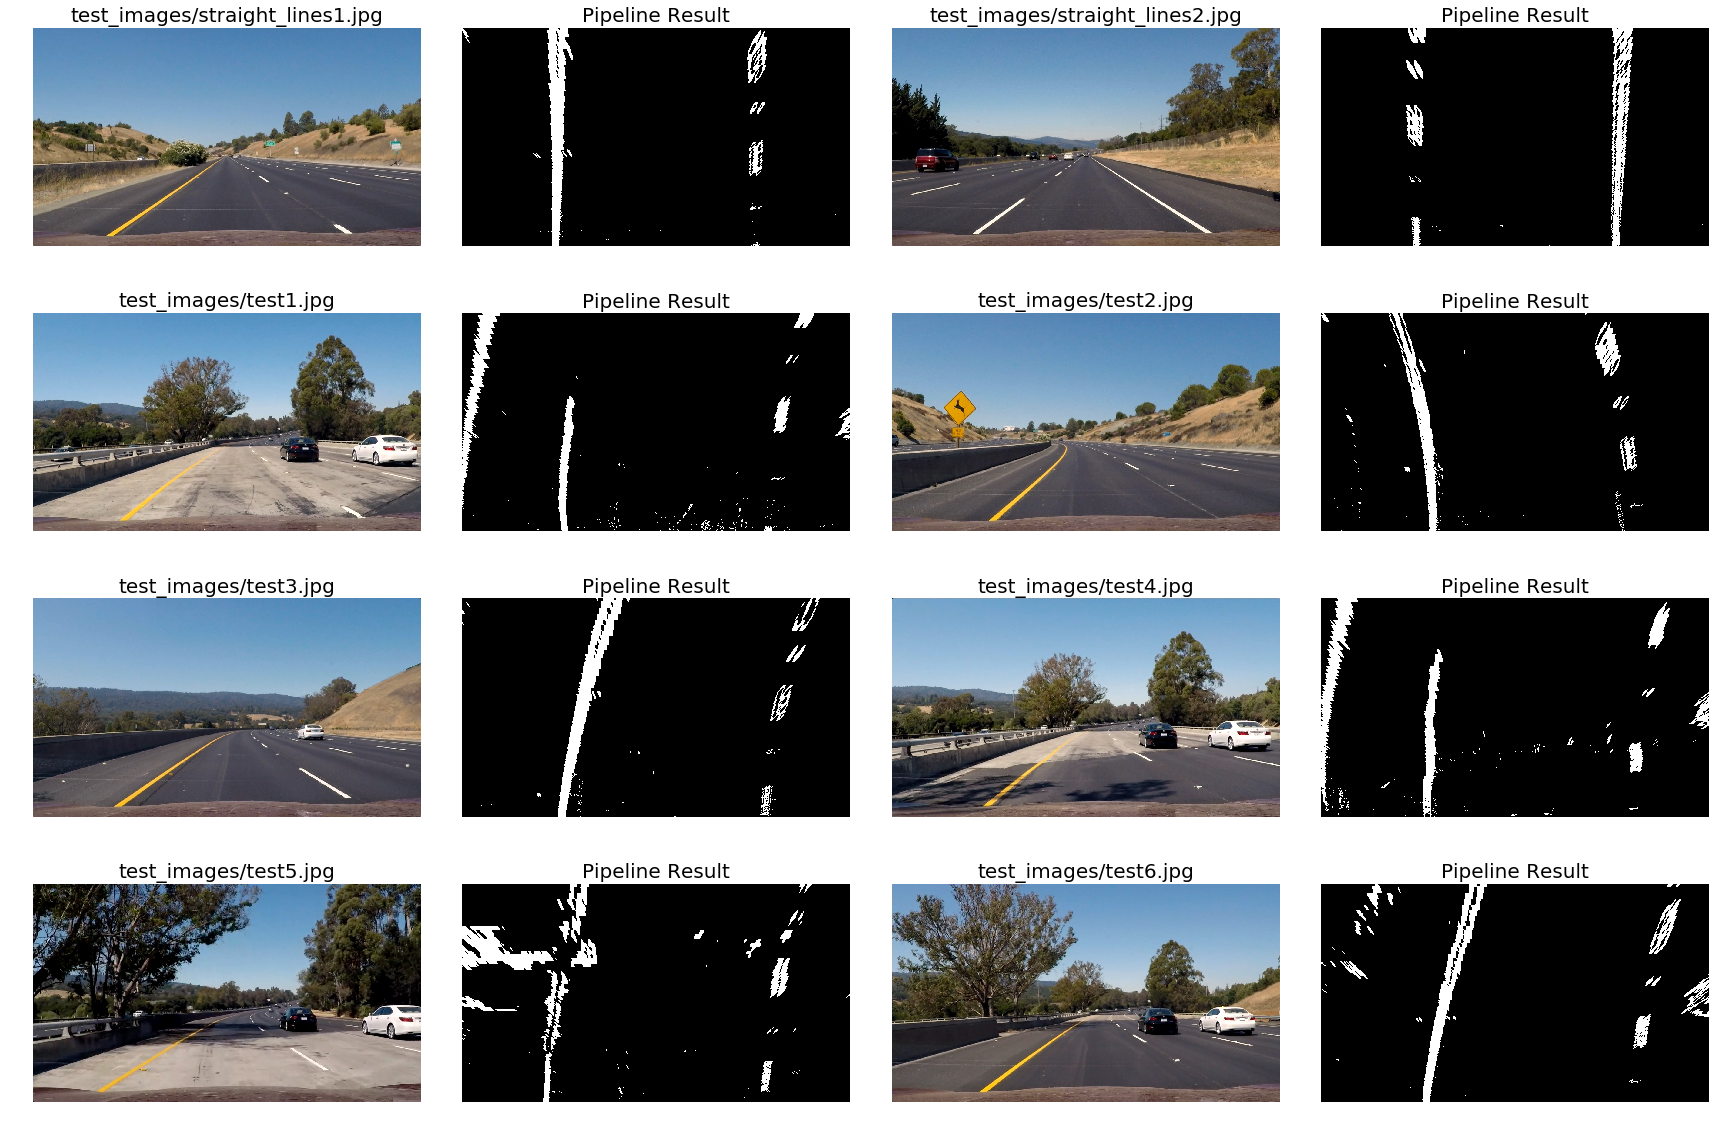

In [200]:
dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# top-left, bottom-left, bottom-right, top-right
pts = np.array([(582, 458), (263, 675), (1047, 675), (699, 458)])
src = np.float32(pts)
offsetx = 300
offsety = 0
x1 = offsetx
y1 = offsety
x2 = img_size[0] - offsetx
y2 = img_size[1] - offsety
dst = np.float32([[x1,y1],[x1,y2],[x2,y2],[x2,y1]])
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

def binary_warp(img, mtx, dist, s_thresh=(170, 255), sx_thresh=(20, 100)):
    # undistort
    img = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    combined = np.zeros_like(sxbinary)
    combined[(sxbinary == 1) | (s_binary == 1)] = 1

    warped = cv2.warpPerspective(combined, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

images = glob.glob('test_images/*.jpg')

results = []

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    image = mpimg.imread(fname)
    result = binary_warp(image, mtx, dist)
    results.extend([(image, fname), (result, 'Pipeline Result')])

n_rows = len(images)//2
n_cols = 2*2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*12/2, n_rows*8/2))
fig.tight_layout()
for i in range(n_rows):
    for j in range(n_cols):
        img = results[i*n_cols+j]
        cmap = 'gray' if j % 2 == 1 else None
        axs[i][j].axis('off')
        axs[i][j].imshow(img[0], cmap=cmap)
        axs[i][j].set_title(img[1], fontsize=20)

plt.savefig('output_images/binary_warp.jpg')

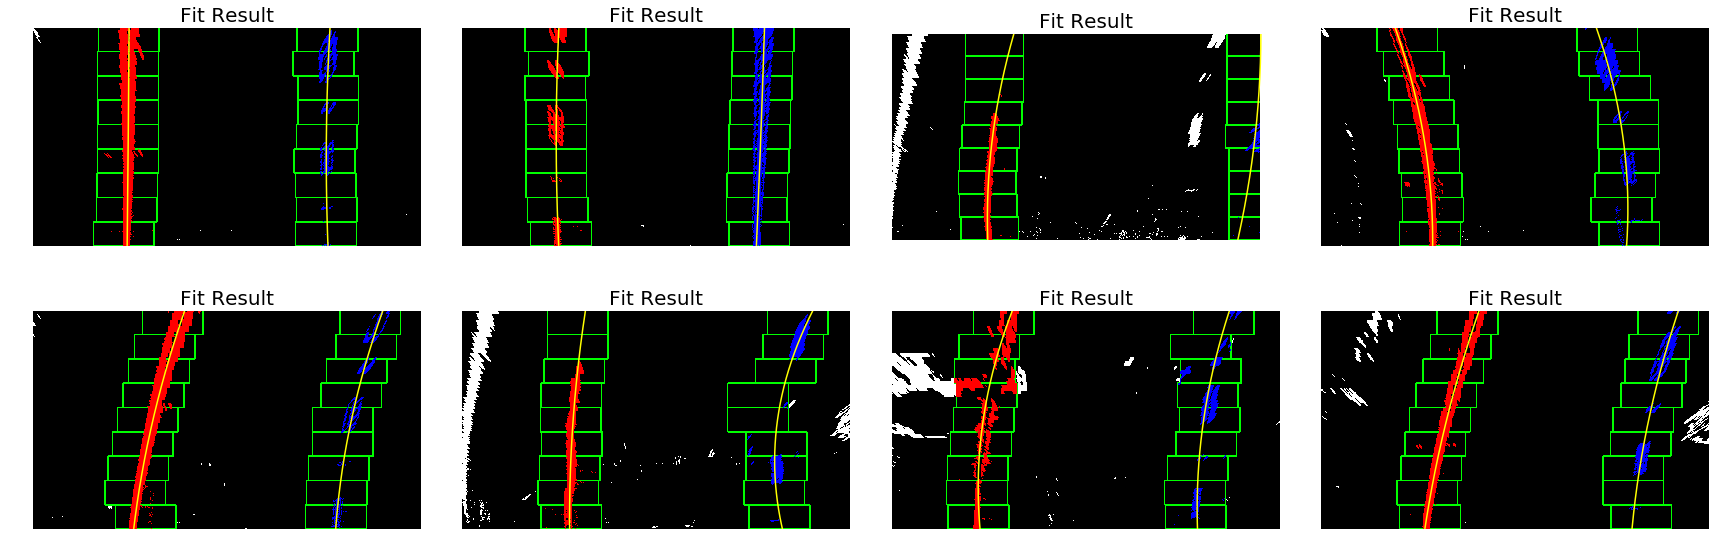

In [201]:

def window_fit(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 3)
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 3)
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    return out_img, left_fit, right_fit

images = glob.glob('test_images/*.jpg')

results = []

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    image = mpimg.imread(fname)
    warped = binary_warp(image, mtx, dist)
    result, left_fit, right_fit = window_fit(warped)
    results.append((result, left_fit, right_fit, 'Fit Result'))

n_rows = len(images)//4
n_cols = 2*2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*12/2, n_rows*8/2))
fig.tight_layout()
for i in range(n_rows):
    for j in range(n_cols):
        ax = axs[i][j]
        img, left_fit, right_fit, title = results[i*n_cols+j]

        # Generate x and y values for plotting
        ploty = np.linspace(0, image.shape[0]-1, image.shape[0] ) # does same as np.array(range(image.shape[0]))
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        
        ax.axis('off')
        ax.imshow(img)
        ax.plot(left_fitx, ploty, color='yellow')
        ax.plot(right_fitx, ploty, color='yellow')
        ax.set_title(title, fontsize=20)

plt.savefig('output_images/window_fit.jpg')

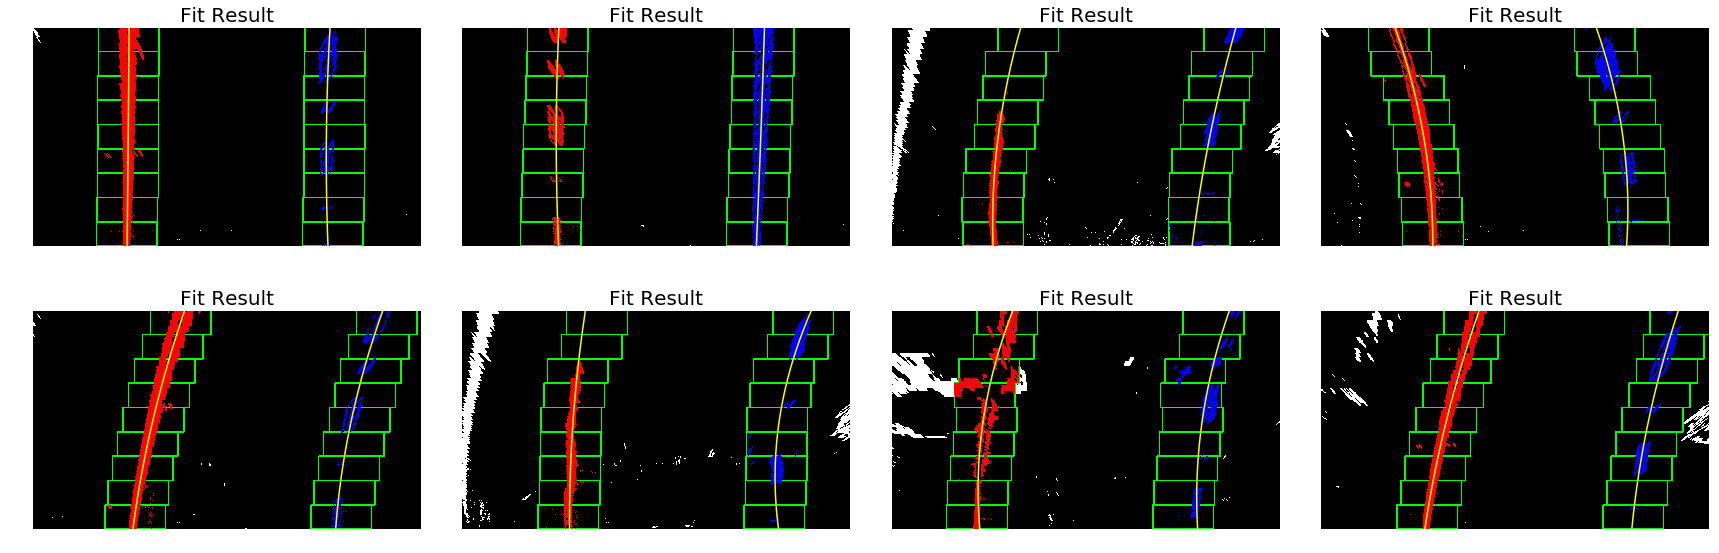

In [207]:

def window_fit(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # width between two lines
    width_between = 680 # 1280 - offsetx * 2
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # minimum number of pixels found to reject this window
    minpix_reject = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    
    def get_rect_inds(window):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        return win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high, good_left_inds, good_right_inds

    # Step through the windows one by one
    for window in range(nwindows):
        yl, yh, xll, xlh, xrl, xrh, good_left_inds, good_right_inds = get_rect_inds(window)

        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        # force to be parallel
        if len(good_left_inds) > len(good_right_inds):
            rightx_current = leftx_current + width_between
        else:
            leftx_current = rightx_current - width_between

        # calculate again
        yl, yh, xll, xlh, xrl, xrh, good_left_inds, good_right_inds = get_rect_inds(window)

        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(xll,yl),(xlh,yh),(0,255,0), 3)
        cv2.rectangle(out_img,(xrl,yl),(xrh,yh),(0,255,0), 3)

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    return out_img, left_fit, right_fit

images = glob.glob('test_images/*.jpg')

results = []

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    image = mpimg.imread(fname)
    warped = binary_warp(image, mtx, dist)
    result, left_fit, right_fit = window_fit(warped)
    results.append((result, left_fit, right_fit, 'Fit Result'))

n_rows = len(images)//4
n_cols = 2*2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*12/2, n_rows*8/2))
fig.tight_layout()
for i in range(n_rows):
    for j in range(n_cols):
        ax = axs[i][j]
        img, left_fit, right_fit, title = results[i*n_cols+j]

        # Generate x and y values for plotting
        ploty = np.linspace(0, image.shape[0]-1, image.shape[0] ) # does same as np.array(range(image.shape[0]))
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        
        ax.axis('off')
        ax.imshow(img)
        ax.plot(left_fitx, ploty, color='yellow')
        ax.plot(right_fitx, ploty, color='yellow')
        ax.set_title(title, fontsize=20)

plt.savefig('output_images/window_fit2.jpg')